Author: Carlos Roberto de Melo

Date: 04/16/2020

Obj: After making the cut in the original image of the HST and determining the center by the MGE, this code centers the central pixel of the MGE with the middle of the image. Usualy before the rotation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from mpdaf.obj import Image, WCS
import astropy.units as u
from mpdaf.obj import deg2sexa, sexa2deg
data_path = "/home/carlos/Desktop/HST Data Reduction/Data/"

[INFO] 2036 x 2067 Image (/home/carlos/Desktop/HST Data Reduction/Data/F160w_no_offset.fits)
[INFO] .data(2036 x 2067) (no unit), no noise
[INFO] center:(00:39:06.3228,09:03:12.102) size:(177.357",186.840") step:(0.087",0.090") rot:-1.0 deg frame:ICRS


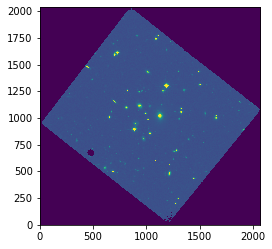

In [2]:
F160W = Image(data_path+'F160w_no_offset.fits', ext=1) #Open the image file
F160W.info() #Display information about the file
F160W.plot(zscale=True)

In [3]:
ref = F160W.data_header['DEC_APER'], F160W.data_header['RA_APER'] #Reference Px
print(ref)

(0.6518055555556, 135.7982083333)


In [4]:
F160W_centerized = F160W.subimage(center=ref, unit_center=u.deg, size=50.0, unit_size=u.arcsec)
    #center: determine the new center
    #unit_center: astropy units of center coordenate. None for px units
    #size: if you disere a new cut, size define the width
    #unit_size: astropy units for the size. None for px units

In [5]:
F160W_centerized.info()

[INFO] 574 x 553 Image (/home/carlos/Desktop/HST Data Reduction/Data/F160w_no_offset.fits)
[INFO] .data(574 x 553) (no unit), no noise
[INFO] center:(00:39:06.5193,09:03:11.5718) size:(50.001",49.987") step:(0.087",0.090") rot:-1.0 deg frame:ICRS


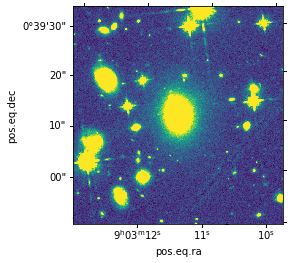

In [6]:
F160W_centerized.plot(zscale=True, use_wcs=True)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
[INFO] 81 x 81 Image (/home/carlos/Desktop/HST Data Reduction/Data/H81.fits)
[INFO] .data(81 x 81) (no unit), no noise
[INFO] center:(00:39:06.8847,09:03:11.5751) size:(5.180",5.180") step:(0.064",0.064") rot:-0.2 deg frame:FK5


(0.6518055555556, 135.7982083333)

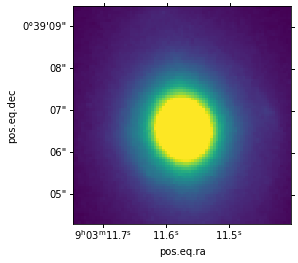

In [7]:
#Open the Image with correct wcs
h81 = Image(data_path+"H81.fits")
h81.info()
h81.plot(use_wcs=True, zscale=True)
h81.data_header["DEC_APER"], h81.data_header["RA_APER"]

In [8]:
h81.data_header["DEC_APER"], h81.data_header["RA_APER"]

(0.6518055555556, 135.7982083333)

In [9]:
F160w_adjusted = F160W_centerized.adjust_coordinates(h81)  #Adjust our data with that with correct wcs

[INFO] Shifted the coordinates by dy=0.0244 dx=0.0437 arcsec


In [13]:
F160w_adjusted = F160w_adjusted.rotate(theta=0.8, interp='spline', reshape=True, regrid=True)
F160w_adjusted.info()

[INFO] 573 x 559 Image (/home/carlos/Desktop/HST Data Reduction/Data/F160w_shifted.fits)
[INFO] .data(573 x 559) (no unit), no noise
[INFO] center:(00:39:06.5657,09:03:11.5739) size:(49.915",50.529") step:(0.087",0.090") rot:-0.2 deg frame:ICRS


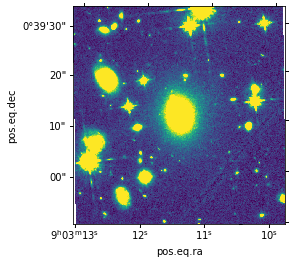

In [14]:
F160w_adjusted.plot(zscale=True, use_wcs=True)

In [15]:
F160w_adjusted.write(data_path+"F160w_shifted.fits")

In [16]:
new = Image(data_path+"F160w_shifted.fits")
new.info()

[INFO] 573 x 559 Image (/home/carlos/Desktop/HST Data Reduction/Data/F160w_shifted.fits)
[INFO] .data(573 x 559) (no unit), no noise
[INFO] center:(00:39:06.5657,09:03:11.5739) size:(49.915",50.529") step:(0.087",0.090") rot:-0.2 deg frame:ICRS


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
